In [1]:
# Example to Demonstrate the
# Union of Two Fuzzy Sets
A = dict()
B = dict()
Y = dict()

A = {"a": 0.2, "b": 0.3, "c": 0.6, "d": 0.6}
B = {"a": 0.9, "b": 0.9, "c": 0.4, "d": 0.5}

print('The First Fuzzy Set is :', A)
print('The Second Fuzzy Set is :', B)
for A_key, B_key in zip(A, B):
    A_value = A[A_key]
    B_value = B[B_key]
    if A_value > B_value:
        Y[A_key] = A_value
    else:
        Y[B_key] = B_value

print('Fuzzy Set Union is :', Y)

The First Fuzzy Set is : {'a': 0.2, 'b': 0.3, 'c': 0.6, 'd': 0.6}
The Second Fuzzy Set is : {'a': 0.9, 'b': 0.9, 'c': 0.4, 'd': 0.5}
Fuzzy Set Union is : {'a': 0.9, 'b': 0.9, 'c': 0.6, 'd': 0.6}


In [2]:
# Example to Demonstrate
# Intersection of Two Fuzzy Sets
A = dict()
B = dict()
Y = dict()

A = {"a": 0.2, "b": 0.3, "c": 0.6, "d": 0.6}
B = {"a": 0.9, "b": 0.9, "c": 0.4, "d": 0.5}

print('The First Fuzzy Set is :', A)
print('The Second Fuzzy Set is :', B)
for A_key, B_key in zip(A, B):
    A_value = A[A_key]
    B_value = B[B_key]
    if A_value < B_value:
        Y[A_key] = A_value
    else:
        Y[B_key] = B_value

print('Fuzzy Set Intersection is :', Y)

The First Fuzzy Set is : {'a': 0.2, 'b': 0.3, 'c': 0.6, 'd': 0.6}
The Second Fuzzy Set is : {'a': 0.9, 'b': 0.9, 'c': 0.4, 'd': 0.5}
Fuzzy Set Intersection is : {'a': 0.2, 'b': 0.3, 'c': 0.4, 'd': 0.5}


In [3]:
# Example to Demonstrate the
# Difference Between Two Fuzzy Sets
A = dict()
Y = dict()
A = {"a": 0.2, "b": 0.3, "c": 0.6, "d": 0.6}

print('The Fuzzy Set is :', A)
for A_key in A:
   Y[A_key]= 1-A[A_key]

print('Fuzzy Set Complement is :', Y)

The Fuzzy Set is : {'a': 0.2, 'b': 0.3, 'c': 0.6, 'd': 0.6}
Fuzzy Set Complement is : {'a': 0.8, 'b': 0.7, 'c': 0.4, 'd': 0.4}


In [4]:
# Example to Demonstrate the
# Difference Between Two Fuzzy Sets
A = dict()
B = dict()
Y = dict()

A = {"a": 0.2, "b": 0.3, "c": 0.6, "d": 0.6}
B = {"a": 0.9, "b": 0.9, "c": 0.4, "d": 0.5}

print('The First Fuzzy Set is :', A)
print('The Second Fuzzy Set is :', B)
for A_key, B_key in zip(A, B):
    A_value = A[A_key]
    B_value = B[B_key]
    B_value = 1 - B_value
    if A_value < B_value:
        Y[A_key] = A_value
    else:
        Y[B_key] = B_value

print('Fuzzy Set Difference is :', Y)

The First Fuzzy Set is : {'a': 0.2, 'b': 0.3, 'c': 0.6, 'd': 0.6}
The Second Fuzzy Set is : {'a': 0.9, 'b': 0.9, 'c': 0.4, 'd': 0.5}
Fuzzy Set Difference is : {'a': 0.09999999999999998, 'b': 0.09999999999999998, 'c': 0.6, 'd': 0.5}


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.1 MB/s eta 0:00:00


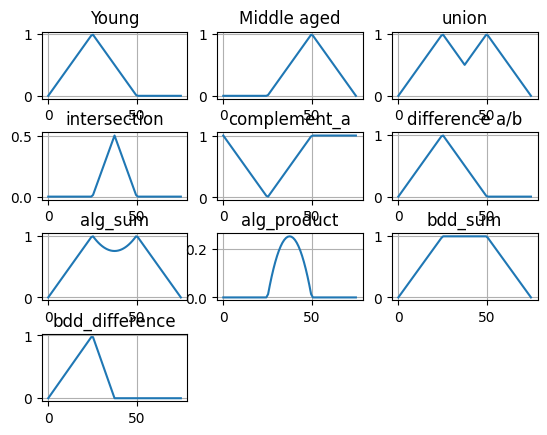

In [6]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz


if __name__ == "__main__":
    # Create universe of discourse in Python using linspace ()
    X = np.linspace(start=0, stop=75, num=75, endpoint=True, retstep=False)

    # Create two fuzzy sets by defining any membership function (trapmf(), gbellmf(),gaussmf(), etc).
    abc1 = [0, 25, 50]
    abc2 = [25, 50, 75]
    young = fuzz.membership.trimf(X, abc1)
    middle_aged = fuzz.membership.trimf(X, abc2)

    # Compute the different operations using inbuilt functions.
    one = np.ones(75)
    zero = np.zeros((75,))
    # 1. Union = max(µA(x), µB(x))
    union = fuzz.fuzzy_or(X, young, X, middle_aged)[1]
    # 2. Intersection = min(µA(x), µB(x))
    intersection = fuzz.fuzzy_and(X, young, X, middle_aged)[1]
    # 3. Complement (A) = (1- min(µA(x))
    complement_a = fuzz.fuzzy_not(young)
    # 4. Difference (A/B) = min(µA(x),(1- µB(x)))
    difference = fuzz.fuzzy_and(X, young, X, fuzz.fuzzy_not(middle_aged)[1])[1]
    # 5. Algebraic Sum = [µA(x) + µB(x) – (µA(x) * µB(x))]
    alg_sum = young + middle_aged - (young * middle_aged)
    # 6. Algebraic Product = (µA(x) * µB(x))
    alg_product = young * middle_aged
    # 7. Bounded Sum = min[1,(µA(x), µB(x))]
    bdd_sum = fuzz.fuzzy_and(X, one, X, young + middle_aged)[1]
    # 8. Bounded difference = min[0,(µA(x), µB(x))]
    bdd_difference = fuzz.fuzzy_or(X, zero, X, young - middle_aged)[1]

    # max-min composition
    # max-product composition

    # Plot each set A, set B and each operation result using plot() and subplot().
    import matplotlib.pyplot as plt

    plt.figure()

    plt.subplot(4, 3, 1)
    plt.plot(X, young)
    plt.title("Young")
    plt.grid(True)

    plt.subplot(4, 3, 2)
    plt.plot(X, middle_aged)
    plt.title("Middle aged")
    plt.grid(True)

    plt.subplot(4, 3, 3)
    plt.plot(X, union)
    plt.title("union")
    plt.grid(True)

    plt.subplot(4, 3, 4)
    plt.plot(X, intersection)
    plt.title("intersection")
    plt.grid(True)

    plt.subplot(4, 3, 5)
    plt.plot(X, complement_a)
    plt.title("complement_a")
    plt.grid(True)

    plt.subplot(4, 3, 6)
    plt.plot(X, difference)
    plt.title("difference a/b")
    plt.grid(True)

    plt.subplot(4, 3, 7)
    plt.plot(X, alg_sum)
    plt.title("alg_sum")
    plt.grid(True)

    plt.subplot(4, 3, 8)
    plt.plot(X, alg_product)
    plt.title("alg_product")
    plt.grid(True)

    plt.subplot(4, 3, 9)
    plt.plot(X, bdd_sum)
    plt.title("bdd_sum")
    plt.grid(True)

    plt.subplot(4, 3, 10)
    plt.plot(X, bdd_difference)
    plt.title("bdd_difference")
    plt.grid(True)

    plt.subplots_adjust(hspace=0.5)
    plt.show()
